<a href="https://colab.research.google.com/github/Zhr-Srj/TripSimAcin-AMR/blob/main/SHAP_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this file we want to recognize the most important features using SHAP analysis.

This file includes results for Table 2 and Table 3 in article.

In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.2 MB/s eta 0:00:00


In [ ]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 6.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import pandas as pd
import shap
import xgboost
import csv

# On my AMR data (Dataset19)

In [ ]:
zero_importance = {}

In [ ]:
def evaluation(true_labels, pred_labels):
  print('Accuracy: ', accuracy_score(true_labels, pred_labels) )
  print('ROC-AUC: ', roc_auc_score(true_labels, pred_labels) )

  TN, FP, FN, TP = confusion_matrix(true_labels, pred_labels, labels=[0, 1]).ravel()

  print("Sensitivity: ", TP/(TP+FN))

  print('Specificity: ', TN/(TN+FP))

  conf_matrix = confusion_matrix(true_labels, pred_labels, labels=[0, 1])
  plt.figure(figsize=(4, 4))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
              xticklabels=['Predicted Negative', 'Predicted Positive'],
              yticklabels=['True Negative', 'True Positive'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()

In [ ]:
with open(r'/content/drive/MyDrive/Dataset19.txt') as f:
    data = []
    for line in f.readlines():
        row = []
        for elem in line.split(sep=','):
            row.append(int(elem.strip()))
        data.append(row)
print(len(data))
print(len(data[0]))

7207
8886


In [ ]:
#Reading phenotypes file
with open(r'/content/drive/MyDrive/drugLabel19.txt') as fy:
    labels = []
    drugs = [] #stores drug name in each row
    row = 0 # row number of each label (is needed because data is reordered while spliting)
    reader = csv.reader(fy)
    for i in reader:
        labels.append([row, int(i[1])])
        drugs.append(i[0])
        row += 1

print(len(labels))
print(len(drugs))
print(labels[:5])

7207
7207
[[0, 1], [1, 1], [2, 0], [3, 0], [4, 1]]


In [ ]:
labels = np.array(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=7)

In [ ]:
X_train_train, X_valid, y_train_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=7)

### XGBoost

In [ ]:
model = xgboost.XGBClassifier(random_state=7).fit(X_train_train, y_train_train[:, 1])
predict = model.predict(X_valid)
#28s

Accuracy:  0.9661751951431049
ROC-AUC:  0.9582313420218903
Sensitivity:  0.9768856447688564
Specificity:  0.9395770392749244


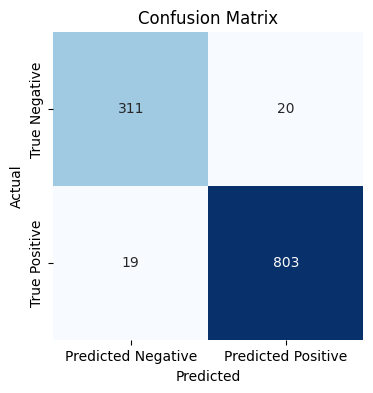

In [ ]:
evaluation(y_valid[:, 1], predict)

In [ ]:
explainer = shap.Explainer(model, seed=7)
shap_values = explainer.shap_values(X_train, y_train[:, 1])

In [ ]:
shap_values.shape

(5765, 8886)

In [ ]:
print(len(X_train))
print(len(X_train[0]))

5765
8886


In [ ]:
shap_values[0].shape

(8886,)

In [ ]:
shap_values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
ll = np.abs(shap_values).mean(0)
remove_features = [i for i, x in enumerate(ll) if (x == [0.]*len(data[0])).all()]
print(len(remove_features))
print(remove_features)

8326
[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 2

In [ ]:
zero_importance['XGBoost'] = remove_features

### Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=7).fit(X_train_train, y_train_train[:, 1])
predict = model.predict(X_valid)
#1m

Accuracy:  0.9540329575021682
ROC-AUC:  0.9542270344969531
Sensitivity:  0.9537712895377128
Specificity:  0.9546827794561934


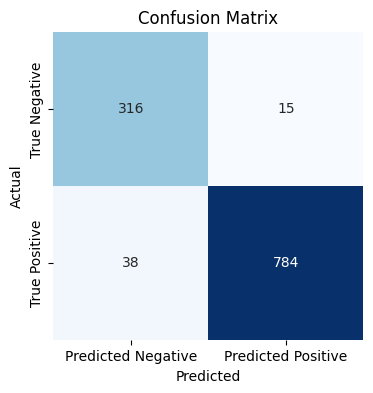

In [ ]:
evaluation(y_valid[:, 1], predict)

In [ ]:
X_train = np.array(X_train)
explainer = shap.Explainer(model, seed=7)
shap_values = explainer.shap_values(X_train, y_train[:, 1])

In [ ]:
shap_values.shape

(5765, 8886, 2)

In [ ]:
shap_values[0]

array([[ 1.39099423e-05, -1.39099423e-05],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00]])

In [ ]:
print(len(X_train))
print(len(X_train[0]))

5765
8886


In [ ]:
shap_values[0].shape

(8886, 2)

In [ ]:
ll = np.abs(shap_values).mean(0)
print(len(ll))
print(ll[:5])
remove_features = [i for i, x in enumerate(ll) if (x == [0., 0.]).all()]
print(len(remove_features))
print(remove_features)

8886
[[1.92585385e-05 1.92585385e-05]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [1.15363145e-05 1.15363145e-05]
 [1.62392916e-04 1.62392916e-04]]
5890
[1, 2, 6, 7, 9, 10, 11, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 32, 33, 34, 35, 36, 38, 39, 41, 42, 43, 44, 45, 46, 48, 49, 51, 52, 53, 54, 55, 56, 59, 61, 62, 63, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 115, 116, 117, 119, 120, 121, 122, 125, 127, 129, 130, 132, 133, 135, 136, 139, 140, 141, 142, 145, 147, 148, 149, 151, 152, 154, 155, 157, 158, 159, 160, 161, 162, 164, 165, 166, 167, 168, 172, 173, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 188, 190, 191, 192, 193, 195, 196, 197, 199, 200, 201, 203, 204, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226, 229, 230, 231, 232, 233, 234, 235, 239, 240, 24

In [ ]:
zero_importance['RF'] = remove_features

In [ ]:
len(np.intersect1d(zero_importance['XGBoost'], zero_importance['RF']))

5890

## Selecting features
We'll use common features selected by RF and XGBoost

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [ ]:
len(np.intersect1d(zero_importance['XGBoost'], zero_importance['RF']))

5890

In [ ]:
to_drop_features = np.intersect1d(zero_importance['XGBoost'], zero_importance['RF'])

In [ ]:
f = open(r'/content/drive/MyDrive/To_drop_features.csv', 'w')
f.write('Featrures which had 0 shap value in both XGBoost and RF\n')
for i in range(len(to_drop_features)-1):
  f.write(str(to_drop_features[i])+',')
f.write(str(to_drop_features[-1]))
f.close()

In [ ]:
with open(r'/content/drive/MyDrive/To_drop_features.csv') as f:
  f.readline()
  to_remove = f.readline().strip().split(',')

len(to_remove)

5890

In [ ]:
to_remove_bacteria = [i for i in to_remove if int(i) < 8005]
to_remove_drug = [i for i in to_remove if int(i) >= 8005]
print('# of to_removes from bacteria: ', len(to_remove_bacteria))
print('# of to_removes from drug: ', len(to_remove_drug))
print('# of selected bacteria features: ', 8005 - len(to_remove_bacteria))
print('# of selected drug features: ', 881 - len(to_remove_drug))

# of to_removes from bacteria:  5312
# of to_removes from drug:  578
# of selected bacteria features:  2693
# of selected drug features:  303


In [ ]:
to_remove = [int(i) for i in to_remove]

In [ ]:
X_train_selected = X_train.drop(to_remove, axis=1)
X_test_selected = X_test.drop(to_remove, axis=1)

In [ ]:
8005 + 881 - 5890

2996

In [ ]:
X_train_selected.shape

(5765, 2996)

In [ ]:
X_test_selected.shape

(1442, 2996)

### Writing selected features

In [ ]:
fd = open(r'/content/drive/MyDrive/Dataset_SHAP.txt', 'w')
fl = open(r'/content/drive/MyDrive/DrugLabel_SHAP.txt', 'w')

labels_cat = np.concatenate((y_train, y_test))

for idx, e in enumerate( pd.concat([X_train_selected, X_test_selected]).values):
  fd.write(','.join(map(str, e)) + '\n')
  fl.write(drugs[labels_cat[idx][0]] + ',' + str(labels_cat[idx][1]) + '\n')

fd.close()
fl.close()

## Results on new dataset

### XGBoost


#### Result for dataset with all features

In [ ]:
model = xgboost.XGBClassifier(random_state=7).fit(X_train, y_train[:, 1])
predict = model.predict(X_test)
#27s

Accuracy:  0.9798890429958391
ROC-AUC:  0.9713966123362096
Sensitivity:  0.9904122722914669
Specificity:  0.9523809523809523


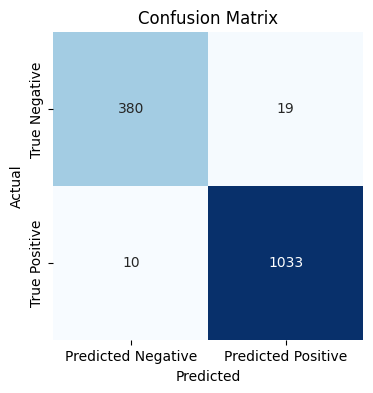

In [ ]:
evaluation(y_test[:, 1], predict)

#### Result for dataset with selected features

In [ ]:
model = xgboost.XGBClassifier(random_state=7).fit(X_train_selected, y_train[:, 1])
predict = model.predict(X_test_selected)
#27s

Accuracy:  0.9798890429958391
ROC-AUC:  0.9713966123362096
Sensitivity:  0.9904122722914669
Specificity:  0.9523809523809523


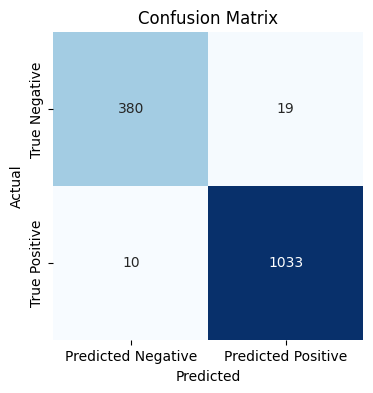

In [ ]:
evaluation(y_test[:, 1], predict)

### Random Forest

#### Result for dataset with all features

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=7).fit(X_train, y_train[:, 1])
predict = model.predict(X_test)
#1m

Accuracy:  0.9687933425797504
ROC-AUC:  0.9583102050428084
Sensitivity:  0.9817833173537871
Specificity:  0.9348370927318296


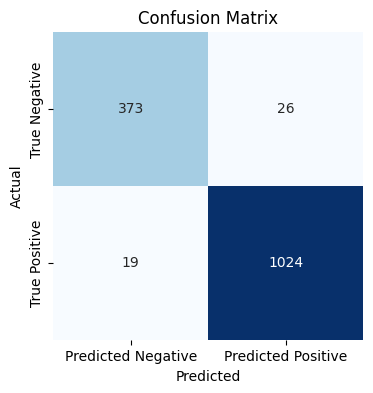

In [ ]:
evaluation(y_test[:, 1], predict)

#### Result for dataset with selected features

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=7).fit(X_train_selected, y_train[:, 1])
predict = model.predict(X_test_selected)
#1m

Accuracy:  0.9687933425797504
ROC-AUC:  0.9559889657028479
Sensitivity:  0.9846596356663471
Specificity:  0.9273182957393483


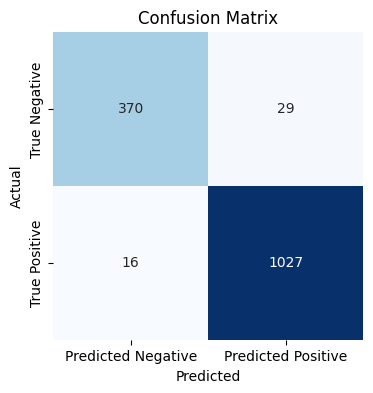

In [ ]:
evaluation(y_test[:, 1], predict)